# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import networkx as nx
from pandas_profiling import ProfileReport

# Importing all 4 datasets

In [2]:
# Import order product dataset
order_products = pd.read_csv('order_products.csv')
order_products

,order_id,product_id,add_to_cart_order,reordered
0,10,24,1,1
1,10,83,2,1
2,10,16,3,0
3,10,24,4,1
4,10,83,5,1
...,...,...,...,...
2019496,3420578,66,17,0
2019497,3420578,16,18,1
2019498,3420693,37,1,0
2019499,3420693,37,2,0


In [3]:
departments = pd.read_csv('departments.csv')
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [4]:
orders = pd.read_csv('orders.csv')
orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2425083,49125,1,2,18,NaN
1,1944304,162867,1,3,17,NaN
2,1201011,147243,14,0,16,3.0
3,1906860,195275,81,1,11,3.0
4,2766469,58222,3,6,11,6.0
...,...,...,...,...,...,...
199995,2768632,137024,14,3,8,8.0
199996,1754449,190356,9,6,15,3.0
199997,792803,84264,5,3,13,21.0
199998,3390742,199430,16,3,18,5.0


In [5]:
products = pd.read_csv('products.csv')
products

,product_id,department_id,product_name
0,61,19,cookies cakes
1,104,13,spices seasonings
2,94,7,tea
3,38,1,frozen meals
4,5,13,marinades meat preparation
...,...,...,...
129,71,16,refrigerated pudding desserts
130,113,1,frozen juice
131,86,16,eggs
132,32,4,packaged produce


# Merging Datasets

In [6]:
df_order = pd.merge(order_products, orders, how='left', on='order_id')
df_order

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,10,24,1,1,135442,4,6,8,8.0
1,10,83,2,1,135442,4,6,8,8.0
2,10,16,3,0,135442,4,6,8,8.0
3,10,24,4,1,135442,4,6,8,8.0
4,10,83,5,1,135442,4,6,8,8.0
...,...,...,...,...,...,...,...,...,...
2019496,3420578,66,17,0,6586,6,5,21,5.0
2019497,3420578,16,18,1,6586,6,5,21,5.0
2019498,3420693,37,1,0,68287,15,6,15,6.0
2019499,3420693,37,2,0,68287,15,6,15,6.0


In [7]:
df_products = pd.merge(products, departments, how='left', on='department_id')
df_products

,product_id,department_id,product_name,department
0,61,19,cookies cakes,snacks
1,104,13,spices seasonings,pantry
2,94,7,tea,beverages
3,38,1,frozen meals,frozen
4,5,13,marinades meat preparation,pantry
...,...,...,...,...
129,71,16,refrigerated pudding desserts,dairy eggs
130,113,1,frozen juice,frozen
131,86,16,eggs,dairy eggs
132,32,4,packaged produce,produce


In [8]:
df = pd.merge(df_order, df_products, how='left', on='product_id')
df

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,department_id,product_name,department
0,10,24,1,1,135442,4,6,8,8.0,4,fresh fruits,produce
1,10,83,2,1,135442,4,6,8,8.0,4,fresh vegetables,produce
2,10,16,3,0,135442,4,6,8,8.0,4,fresh herbs,produce
3,10,24,4,1,135442,4,6,8,8.0,4,fresh fruits,produce
4,10,83,5,1,135442,4,6,8,8.0,4,fresh vegetables,produce
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3420578,66,17,0,6586,6,5,21,5.0,6,asian foods,international
2019497,3420578,16,18,1,6586,6,5,21,5.0,4,fresh herbs,produce
2019498,3420693,37,1,0,68287,15,6,15,6.0,1,ice cream ice,frozen
2019499,3420693,37,2,0,68287,15,6,15,6.0,1,ice cream ice,frozen


In [9]:
#number of items bought by department
dff=df[['product_id','department_id','product_name','department']]
pd.set_option('display.max_rows', 134)
dff.groupby('department')['product_name'].value_counts()

department       product_name                 
alcohol          beers coolers                      3002
                 red wines                          2135
                 white wines                        1893
                 spirits                            1795
                 specialty wines champagnes          614
babies           baby food formula                 23355
                 diapers wipes                      1566
                 baby bath body care                 515
                 baby accessories                    504
bakery           bread                             36381
                 breakfast bakery                  15357
                 tortillas flat bread              12082
                 buns rolls                         6949
                 bakery desserts                    2214
beverages        water seltzer sparkling water     52564
                 refrigerated                      35893
                 soft drinks             

In [10]:
#convert dataframe into a trasactional type of dataframe where each rows is a transaction with all items in basket.
#this transformation was needed in order to import to R and perform the visualization
transact=df[['order_id','product_name']]
transact['basket'] = df.apply(lambda x: ','.join([x['product_name']]), axis=1)

<ipython-input-10-4710d61aeb1e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['basket'] = df.apply(lambda x: ','.join([x['product_name']]), axis=1)


In [11]:
#grouping by order_id
transact = transact.groupby('order_id')['basket'].apply(list)
transact=transact.to_frame()
transact

,basket
order_id,
10,"[fresh fruits, fresh vegetables, fresh herbs, ..."
11,"[frozen meals, fresh dips tapenades, canned me..."
28,"[butter, other creams cheeses, poultry counter..."
38,"[nuts seeds dried fruit, packaged vegetables f..."
56,"[canned jarred vegetables, packaged cheese, fr..."
...,...
3420991,"[refrigerated, soy lactosefree, packaged veget..."
3421019,"[frozen produce, other creams cheeses, canned ..."
3421027,"[canned jarred vegetables, packaged vegetables..."


In [12]:
#exporting dataframe as csv - commented in order to not execute the export 
#csv present in other BC3_others_groupJ folder
#the csv was cleaned in excel in order to remove unwanted symbols [] ""

#transact.to_csv('transact.csv')

# Dropping Unnecessary Columns

In [13]:
df1 = df.copy()
df1.drop(['add_to_cart_order', "reordered"], axis=1, inplace=True)

## Initial Dataset Exploration

In [14]:
#prof = ProfileReport(df1)
#prof

In [15]:
df1.astype(object).describe()

,order_id,product_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,department_id,product_name,department
count,2019501,2019501,2019501,2019501,2019501,2019501,1895159.0,2019501,2019501,2019501
unique,200000,134,105273,100,7,24,31.0,21,134,21
top,790903,24,176478,1,0,10,7.0,4,fresh fruits,produce
freq,137,226039,460,124342,391831,173306,214126.0,588996,226039,588996


In [16]:
#Most reordered items
reordered_items= df[df['reordered'] == 1]
reordered_items['product_name'].value_counts()

fresh fruits                     162355
fresh vegetables                 126171
packaged vegetables fruits        69872
yogurt                            62464
milk                              43162
water seltzer sparkling water     38467
packaged cheese                   35864
soy lactosefree                   27251
chips pretzels                    26615
bread                             24540
refrigerated                      23854
eggs                              19798
frozen produce                    17425
energy granola bars               17181
crackers                          16257
ice cream ice                     15185
lunch meat                        15003
soft drinks                       14299
baby food formula                 13847
fresh dips tapenades              13639
cream                             13625
frozen meals                      13622
cereal                            13593
juice nectars                     12378
packaged produce                  12021


In [17]:
#Items purchased on Sunday
sundaypur = df1[df1['order_dow'] == 0]
sundaypur['product_name'].value_counts()

fresh vegetables                 46643
fresh fruits                     44727
packaged vegetables fruits       23169
yogurt                           17192
packaged cheese                  12526
milk                             10113
water seltzer sparkling water     8588
chips pretzels                    7944
soy lactosefree                   7457
bread                             7193
frozen produce                    6834
refrigerated                      6452
eggs                              5970
ice cream ice                     5851
crackers                          5231
lunch meat                        5060
fresh herbs                       5020
energy granola bars               4986
frozen meals                      4879
baby food formula                 4745
soup broth bouillon               4402
cereal                            4326
fresh dips tapenades              4222
canned jarred vegetables          4120
canned meals beans                3858
hot dogs bacon sausage   

In [18]:
#Checking the items purchased on unusual hours, 0 to 6 AM
pur0to6 = df1[df1['order_hour_of_day'] < 7]
pur0to6['product_name'].value_counts()

fresh fruits                     6194
fresh vegetables                 5787
packaged vegetables fruits       3038
yogurt                           2479
packaged cheese                  1614
milk                             1431
water seltzer sparkling water    1355
chips pretzels                   1148
soy lactosefree                  1102
refrigerated                     1058
frozen produce                   1018
bread                             972
ice cream ice                     883
eggs                              797
crackers                          763
frozen meals                      762
energy granola bars               649
lunch meat                        647
cereal                            647
fresh herbs                       631
soft drinks                       613
juice nectars                     600
soup broth bouillon               584
baby food formula                 580
fresh dips tapenades              572
hot dogs bacon sausage            565
baking ingre

## Building Visualizations regarding distribution of orders according to different dimensions

### Orders per hour of day

In [19]:
hourday_orders_series = df1.groupby('order_hour_of_day')['order_id'].nunique()
hourday_orders_series

order_hour_of_day
0      1311
1       719
2       429
3       287
4       330
5       555
6      1803
7      5310
8     10294
9     14989
10    17102
11    16748
12    15942
13    16189
14    16600
15    16649
16    15928
17    13201
18    10716
19     8164
20     6209
21     4492
22     3731
23     2302
Name: order_id, dtype: int64

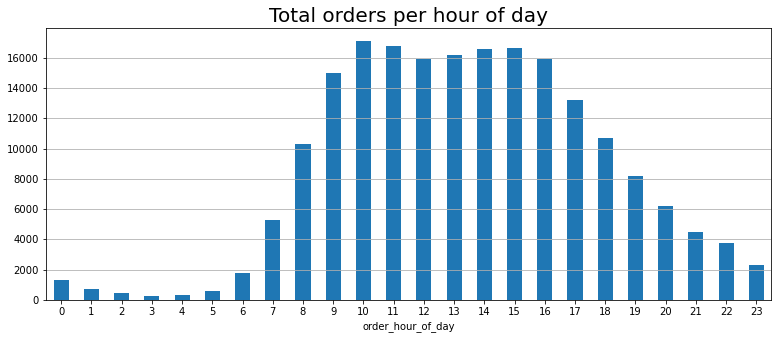

In [20]:
hourday_orders_series.plot.bar(figsize=(13,5))
plt.title('Total orders per hour of day', fontsize = 20)
plt.xticks(rotation = 0 )
plt.grid(axis='y')
plt.show()

### Days since last purchase

In [21]:
lastpurchasedays_series = df1.groupby('days_since_prior_order')['order_id'].nunique()
lastpurchasedays_series

days_since_prior_order
0.0      4016
1.0      8756
2.0     11362
3.0     12673
4.0     13054
5.0     12508
6.0     14262
7.0     18882
8.0     10466
9.0      6918
10.0     5739
11.0     4810
12.0     4453
13.0     4808
14.0     5769
15.0     3904
16.0     2660
17.0     2296
18.0     2140
19.0     1946
20.0     2172
21.0     2634
22.0     1907
23.0     1338
24.0     1214
25.0     1142
26.0     1069
27.0     1239
28.0     1497
29.0     1130
30.0    20982
Name: order_id, dtype: int64

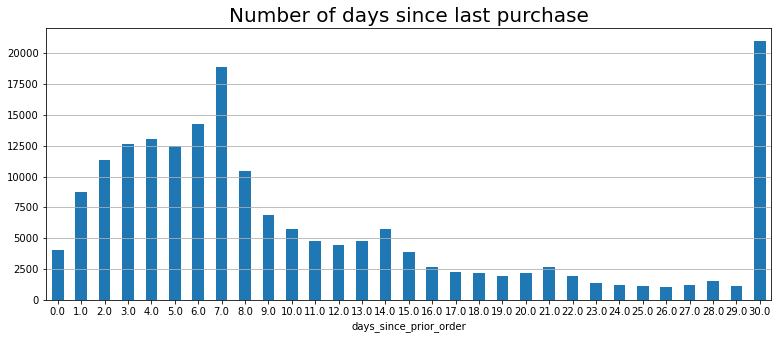

In [22]:
lastpurchasedays_series.plot.bar(figsize=(13,5))
plt.title('Number of days since last purchase', fontsize = 20)
plt.xticks(rotation = 0 )
plt.grid(axis='y')
plt.show()

### Orders per day of the week

In [23]:
weekday_orders_series = df1.groupby('order_dow')['order_id'].nunique()
weekday_orders_series

order_dow
0    35078
1    34348
2    27277
3    25670
4    24974
5    26557
6    26096
Name: order_id, dtype: int64

In [24]:
weekday_orders_series.rename({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',4: 'Thursday', 5: 'Friday', 6: 'Saturday'}, inplace=True)

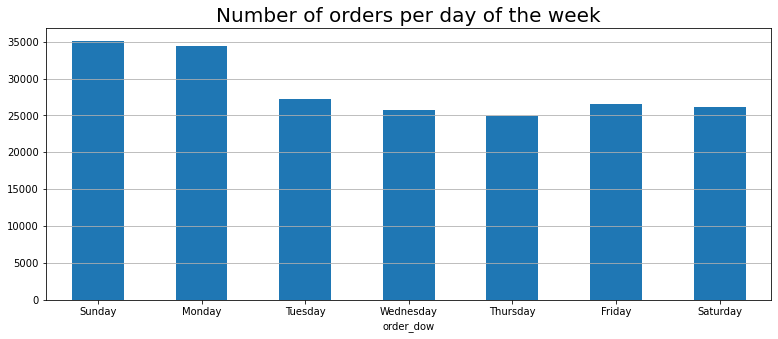

In [25]:
weekday_orders_series.plot.bar(figsize=(13,5))
plt.title('Number of orders per day of the week', fontsize = 20)
plt.xticks(rotation = 0 )
plt.grid(axis='y')
plt.show()

# Modelling phase

## Creating Df's for modelling

### Orders and product names

In [26]:
df2 = df1.copy()
df2.drop(['user_id', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'department_id',
       'product_id', 'department'], axis=1, inplace=True)
df2

,order_id,product_name
0,10,fresh fruits
1,10,fresh vegetables
2,10,fresh herbs
3,10,fresh fruits
4,10,fresh vegetables
...,...,...
2019496,3420578,asian foods
2019497,3420578,fresh herbs
2019498,3420693,ice cream ice
2019499,3420693,ice cream ice


### Orders and department

In [27]:
df3 = df1.copy()
df3.drop(['user_id', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'department_id',
       'product_id', 'product_name'], axis=1, inplace=True)
df3

,order_id,department
0,10,produce
1,10,produce
2,10,produce
3,10,produce
4,10,produce
...,...,...
2019496,3420578,international
2019497,3420578,produce
2019498,3420693,frozen
2019499,3420693,frozen


## Pivot Table of orders according to products respective departments 

In [28]:
pt1 = pd.pivot_table(df3, index='order_id', columns='department', 
                    aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)
pt1.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
order_id,,,,,,,,,,,,,,,,,,,,,
10,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
56,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Calculating department support levels

In [29]:
frequent_department = apriori(pt1, min_support=0.05, use_colnames=True)
frequent_department['length'] = frequent_department['itemsets'].apply(lambda x: len(x))
frequent_department1 = frequent_department[frequent_department['length'] == 1]
frequent_department1.sort_values(by='support', ascending=True, inplace=True)
frequent_department1.set_index('itemsets', inplace=True)
frequent_department1.drop(['length'],axis=1,inplace=True)
frequent_department1

<ipython-input-29-4ba1f1f8bee4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frequent_department1.sort_values(by='support', ascending=True, inplace=True)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,support
itemsets,
(babies),0.054550
(international),0.068990
(personal care),0.099480
(household),0.147675
(breakfast),0.163495
(meat seafood),0.179535
(dry goods pasta),0.186190
(canned goods),0.211275
(deli),0.238885


In [30]:
rulesConfidence2 = association_rules(frequent_department, metric="confidence", min_threshold=0)
rulesConfidence2.sort_values(by='leverage', ascending=True, inplace=True)
rulesConfidence2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
129,(household),(produce),0.147675,0.748065,0.102695,0.695412,0.929615,-0.007775,0.827134
128,(produce),(household),0.748065,0.147675,0.102695,0.137281,0.929615,-0.007775,0.987952
42,(produce),(beverages),0.748065,0.456190,0.334630,0.447327,0.980573,-0.006630,0.983964
43,(beverages),(produce),0.456190,0.748065,0.334630,0.733532,0.980573,-0.006630,0.945461
145,(personal care),(produce),0.099480,0.748065,0.070550,0.709188,0.948030,-0.003868,0.866315
...,...,...,...,...,...,...,...,...,...
244,(bakery),"(produce, dairy eggs)",0.273565,0.549105,0.194525,0.711074,1.294969,0.044309,1.560591
2120,"(produce, frozen)","(dairy eggs, snacks)",0.298235,0.322820,0.140600,0.471440,1.460381,0.044324,1.281180
2125,"(dairy eggs, snacks)","(produce, frozen)",0.322820,0.298235,0.140600,0.435537,1.460381,0.044324,1.243243
2122,"(produce, snacks)","(frozen, dairy eggs)",0.337510,0.283205,0.140600,0.416580,1.470949,0.045015,1.228609


### Creating respective visualization

In [31]:
department_prodcount = df1.groupby('department')['product_id'].nunique()
dep_prodcount = department_prodcount.to_frame()
dep_prodcount.sort_values(by='product_id', ascending=True, inplace=True)

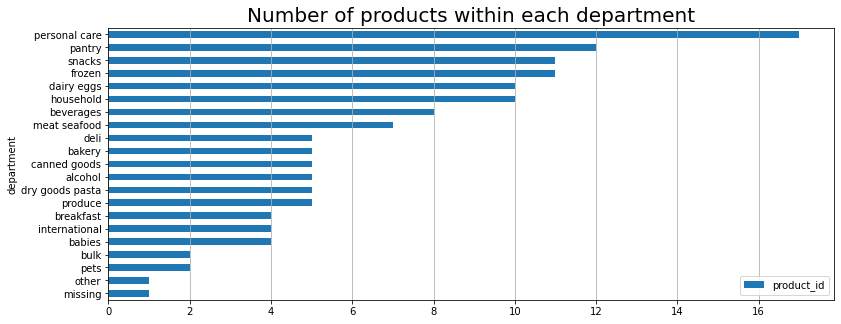

In [32]:
dep_prodcount.plot.barh(figsize=(13,5))
plt.title('Number of products within each department', fontsize = 20)
plt.xticks(rotation = 0 )
plt.grid(axis='x')
plt.show()

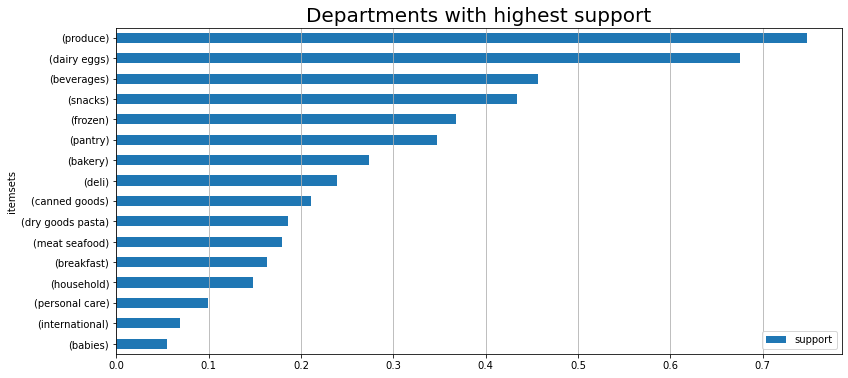

In [33]:
#ONLY LENGTH 1 DEPARTMENTS
frequent_department1.plot.barh(figsize=(13,6))
plt.title('Departments with highest support', fontsize = 20)
plt.xticks(rotation = 0 )
plt.grid(axis='x')
plt.show()

## Creating Pivot Table of orders of products

In [34]:
pt = pd.pivot_table(df2, index='order_id', columns='product_name', 
                    aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)
pt.head()

product_name,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
order_id,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Filtering itemsets with support over 0,02 to calculate the Substitute items

In [35]:
frequent_itemsets = apriori(pt, min_support=0.02, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.043330,(asian foods),1
1,0.045355,(baby food formula),1
2,0.076635,(baking ingredients),1
3,0.163865,(bread),1
4,0.067765,(breakfast bakery),1
...,...,...,...
832,0.023210,"(milk, fresh fruits, yogurt, fresh vegetables,...",5
833,0.032845,"(milk, fresh fruits, yogurt, fresh vegetables,...",5
834,0.034565,"(fresh fruits, yogurt, fresh vegetables, packa...",5
835,0.021475,"(fresh fruits, yogurt, fresh vegetables, soy l...",5


In [36]:
frequent_itemsets.sort_values(by='support', ascending=False, inplace=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
26,0.555995,(fresh fruits),1
28,0.444360,(fresh vegetables),1
57,0.365415,(packaged vegetables fruits),1
236,0.317560,"(fresh fruits, fresh vegetables)",2
258,0.269870,"(packaged vegetables fruits, fresh fruits)",2
...,...,...,...
701,0.020105,"(yogurt, soup broth bouillon, fresh vegetables)",3
124,0.020070,"(candy chocolate, chips pretzels)",2
379,0.020020,"(packaged cheese, oils vinegars)",2
39,0.020015,(honeys syrups nectars),1


In [37]:
#Only Lenght 1 itemsets
frequent_itemsets[frequent_itemsets['length'] == 1]

,support,itemsets,length
26,0.555995,(fresh fruits),1
28,0.444360,(fresh vegetables),1
57,0.365415,(packaged vegetables fruits),1
77,0.263675,(yogurt),1
49,0.243325,(milk),1
54,0.230995,(packaged cheese),1
76,0.193005,(water seltzer sparkling water),1
12,0.169435,(chips pretzels),1
69,0.168355,(soy lactosefree),1
3,0.163865,(bread),1


### Building respective Visualization

In [38]:
frequent_itemsets1 = frequent_itemsets.copy()
frequent_itemsets1.drop(['length'], axis=1, inplace=True)
frequent_itemsets1.set_index('itemsets',inplace=True)
frequent_itemsets1.sort_values(by='support', ascending=True, inplace=True)
frequent_itemsets1

,support
itemsets,
"(fresh fruits, butter, yogurt)",0.020015
(honeys syrups nectars),0.020015
"(packaged cheese, oils vinegars)",0.020020
"(candy chocolate, chips pretzels)",0.020070
"(yogurt, soup broth bouillon, fresh vegetables)",0.020105
...,...
"(packaged vegetables fruits, fresh fruits)",0.269870
"(fresh fruits, fresh vegetables)",0.317560
(packaged vegetables fruits),0.365415


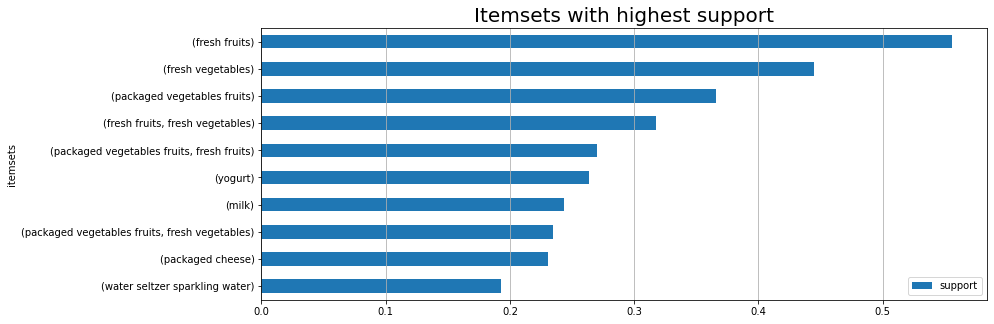

In [39]:
frequent_itemsets1.tail(10).plot.barh(figsize=(13,5))
plt.title('Itemsets with highest support', fontsize = 20)
plt.xticks(rotation = 0 )
plt.grid(axis='x')
plt.show()

In [40]:
#Confidence threshold
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0)
rulesConfidence.sort_values(by='leverage', ascending=True, inplace=True)
rulesConfidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1843,(fresh vegetables),(soft drinks),0.444360,0.087310,0.027845,0.062663,0.717709,-0.010952,0.973705
1842,(soft drinks),(fresh vegetables),0.087310,0.444360,0.027845,0.318921,0.717709,-0.010952,0.815823
783,(fresh fruits),(soft drinks),0.555995,0.087310,0.039585,0.071197,0.815447,-0.008959,0.982652
782,(soft drinks),(fresh fruits),0.087310,0.555995,0.039585,0.453384,0.815447,-0.008959,0.812280
2450,(soft drinks),(packaged vegetables fruits),0.087310,0.365415,0.024480,0.280380,0.767293,-0.007424,0.881834
...,...,...,...,...,...,...,...,...,...
0,(fresh fruits),(fresh vegetables),0.555995,0.444360,0.317560,0.571156,1.285346,0.070498,1.295670
10,"(fresh fruits, fresh vegetables)",(packaged vegetables fruits),0.317560,0.365415,0.186580,0.587543,1.607877,0.070539,1.538546
11,(packaged vegetables fruits),"(fresh fruits, fresh vegetables)",0.365415,0.317560,0.186580,0.510598,1.607877,0.070539,1.394435
5,(fresh vegetables),(packaged vegetables fruits),0.444360,0.365415,0.234555,0.527849,1.444519,0.072179,1.344030


In [41]:
rulesConfidence[rulesConfidence['lift'] < 0.95]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1843,(fresh vegetables),(soft drinks),0.444360,0.087310,0.027845,0.062663,0.717709,-0.010952,0.973705
1842,(soft drinks),(fresh vegetables),0.087310,0.444360,0.027845,0.318921,0.717709,-0.010952,0.815823
783,(fresh fruits),(soft drinks),0.555995,0.087310,0.039585,0.071197,0.815447,-0.008959,0.982652
782,(soft drinks),(fresh fruits),0.087310,0.555995,0.039585,0.453384,0.815447,-0.008959,0.812280
2450,(soft drinks),(packaged vegetables fruits),0.087310,0.365415,0.024480,0.280380,0.767293,-0.007424,0.881834
2451,(packaged vegetables fruits),(soft drinks),0.365415,0.087310,0.024480,0.066992,0.767293,-0.007424,0.978223
3034,(packaged produce),(fresh vegetables),0.062270,0.444360,0.022580,0.362614,0.816037,-0.005090,0.871749
3035,(fresh vegetables),(packaged produce),0.444360,0.062270,0.022580,0.050815,0.816037,-0.005090,0.987931
1319,(paper goods),(fresh fruits),0.063575,0.555995,0.032090,0.504758,0.907847,-0.003257,0.896542
1318,(fresh fruits),(paper goods),0.555995,0.063575,0.032090,0.057716,0.907847,-0.003257,0.993782


In [42]:
#Lift Threshold
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=0)
rulesLift.sort_values(by='lift', ascending=True, inplace=True)
rulesLift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1842,(soft drinks),(fresh vegetables),0.087310,0.444360,0.027845,0.318921,0.717709,-0.010952,0.815823
1843,(fresh vegetables),(soft drinks),0.444360,0.087310,0.027845,0.062663,0.717709,-0.010952,0.973705
2450,(soft drinks),(packaged vegetables fruits),0.087310,0.365415,0.024480,0.280380,0.767293,-0.007424,0.881834
2451,(packaged vegetables fruits),(soft drinks),0.365415,0.087310,0.024480,0.066992,0.767293,-0.007424,0.978223
783,(fresh fruits),(soft drinks),0.555995,0.087310,0.039585,0.071197,0.815447,-0.008959,0.982652
...,...,...,...,...,...,...,...,...,...
3423,"(yogurt, packaged cheese)","(milk, packaged vegetables fruits, fresh fruits)",0.088520,0.087450,0.021585,0.243843,2.788373,0.013844,1.206826
3407,"(milk, fresh fruits, packaged cheese)","(yogurt, packaged vegetables fruits)",0.059885,0.127910,0.021585,0.360441,2.817925,0.013925,1.363580
3422,"(yogurt, packaged vegetables fruits)","(milk, fresh fruits, packaged cheese)",0.127910,0.059885,0.021585,0.168751,2.817925,0.013925,1.130967
3417,"(milk, packaged vegetables fruits)","(yogurt, fresh fruits, packaged cheese)",0.107425,0.070020,0.021585,0.200931,2.869621,0.014063,1.163829


In [43]:
rulesLift[rulesLift['lift'] < 0.95]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1842,(soft drinks),(fresh vegetables),0.087310,0.444360,0.027845,0.318921,0.717709,-0.010952,0.815823
1843,(fresh vegetables),(soft drinks),0.444360,0.087310,0.027845,0.062663,0.717709,-0.010952,0.973705
2450,(soft drinks),(packaged vegetables fruits),0.087310,0.365415,0.024480,0.280380,0.767293,-0.007424,0.881834
2451,(packaged vegetables fruits),(soft drinks),0.365415,0.087310,0.024480,0.066992,0.767293,-0.007424,0.978223
783,(fresh fruits),(soft drinks),0.555995,0.087310,0.039585,0.071197,0.815447,-0.008959,0.982652
782,(soft drinks),(fresh fruits),0.087310,0.555995,0.039585,0.453384,0.815447,-0.008959,0.812280
3035,(fresh vegetables),(packaged produce),0.444360,0.062270,0.022580,0.050815,0.816037,-0.005090,0.987931
3034,(packaged produce),(fresh vegetables),0.062270,0.444360,0.022580,0.362614,0.816037,-0.005090,0.871749
3931,(soft drinks),(yogurt),0.087310,0.263675,0.020600,0.235941,0.894817,-0.002421,0.963702
3930,(yogurt),(soft drinks),0.263675,0.087310,0.020600,0.078126,0.894817,-0.002421,0.990038


In [44]:
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2020,"(yogurt, fresh fruits, packaged cheese)","(milk, packaged vegetables fruits)",0.070020,0.107425,0.021585,0.308269,2.869621,0.014063,1.290350
2025,"(milk, packaged vegetables fruits)","(yogurt, fresh fruits, packaged cheese)",0.107425,0.070020,0.021585,0.200931,2.869621,0.014063,1.163829
2030,"(yogurt, packaged vegetables fruits)","(milk, fresh fruits, packaged cheese)",0.127910,0.059885,0.021585,0.168751,2.817925,0.013925,1.130967
2015,"(milk, fresh fruits, packaged cheese)","(yogurt, packaged vegetables fruits)",0.059885,0.127910,0.021585,0.360441,2.817925,0.013925,1.363580
2031,"(yogurt, packaged cheese)","(milk, packaged vegetables fruits, fresh fruits)",0.088520,0.087450,0.021585,0.243843,2.788373,0.013844,1.206826
...,...,...,...,...,...,...,...,...,...
1225,"(eggs, milk, fresh vegetables)",(fresh fruits),0.030660,0.555995,0.025580,0.834312,1.500574,0.008533,2.679762
572,"(energy granola bars, packaged vegetables fruits)",(fresh fruits),0.039500,0.555995,0.032945,0.834051,1.500105,0.010983,2.675545
575,(fresh fruits),"(energy granola bars, packaged vegetables fruits)",0.555995,0.039500,0.032945,0.059254,1.500105,0.010983,1.020998
1436,(other creams cheeses),"(packaged vegetables fruits, fresh fruits, fre...",0.086485,0.186580,0.024205,0.279875,1.500027,0.008069,1.129554


### Defining Substitute Items after analysis of tables above

In [45]:
substitutes = ["783","3035","3991","3930"]

In [46]:
filter_substitutes  = rulesConfidence[rulesConfidence.index.isin(substitutes)]
filter_substitutes

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
783,(fresh fruits),(soft drinks),0.555995,0.087310,0.039585,0.071197,0.815447,-0.008959,0.982652
3035,(fresh vegetables),(packaged produce),0.444360,0.062270,0.022580,0.050815,0.816037,-0.005090,0.987931
3930,(yogurt),(soft drinks),0.263675,0.087310,0.020600,0.078126,0.894817,-0.002421,0.990038
3991,(soft drinks),(milk),0.087310,0.243325,0.020530,0.235139,0.966358,-0.000715,0.989298


## Filtering itemsets with support over 0,05 to calculate Complementary Items

In [47]:
frequent_itemsetscomp = apriori(pt, min_support=0.05, use_colnames=True)
frequent_itemsetscomp['length'] = frequent_itemsetscomp['itemsets'].apply(lambda x: len(x))
frequent_itemsetscomp

,support,itemsets,length
0,0.076635,(baking ingredients),1
1,0.163865,(bread),1
2,0.067765,(breakfast bakery),1
3,0.074330,(butter),1
4,0.069305,(candy chocolate),1
...,...,...,...
151,0.051295,"(yogurt, milk, packaged vegetables fruits)",3
152,0.051915,"(yogurt, packaged vegetables fruits, packaged ...",3
153,0.062535,"(milk, packaged vegetables fruits, fresh fruit...",4
154,0.068325,"(packaged vegetables fruits, fresh fruits, pac...",4


In [48]:
# Generate the association rules - by confidence
rulesConfidenceComp = association_rules(frequent_itemsetscomp, metric="confidence", min_threshold=0.50)
rulesConfidenceComp.sort_values(by='lift', ascending=False, inplace=True)
rulesConfidenceComp['length'] = rulesConfidenceComp['antecedents'].apply(lambda x: len(x))
rulesConfidenceComp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
66,(fresh herbs),"(fresh fruits, fresh vegetables)",0.093005,0.317560,0.061815,0.664642,2.092964,0.032280,2.034958,1
64,"(fresh herbs, fresh fruits)",(fresh vegetables),0.070135,0.444360,0.061815,0.881372,1.983463,0.030650,4.683872,2
127,"(yogurt, fresh vegetables)","(packaged vegetables fruits, fresh fruits)",0.144660,0.269870,0.076240,0.527029,1.952899,0.037201,1.543710,2
34,(fresh herbs),(fresh vegetables),0.093005,0.444360,0.078655,0.845707,1.903203,0.037327,3.601205,1
121,"(packaged vegetables fruits, packaged cheese)","(fresh fruits, fresh vegetables)",0.114610,0.317560,0.068325,0.596152,1.877290,0.031929,1.689844,2
126,"(yogurt, packaged vegetables fruits)","(fresh fruits, fresh vegetables)",0.127910,0.317560,0.076240,0.596044,1.876950,0.035621,1.689392,2
122,"(packaged cheese, fresh vegetables)","(packaged vegetables fruits, fresh fruits)",0.135850,0.269870,0.068325,0.502944,1.863654,0.031663,1.468910,2
117,"(milk, fresh vegetables)","(packaged vegetables fruits, fresh fruits)",0.124715,0.269870,0.062535,0.501423,1.858018,0.028878,1.464428,2
116,"(milk, packaged vegetables fruits)","(fresh fruits, fresh vegetables)",0.107425,0.317560,0.062535,0.582127,1.833125,0.028421,1.633128,2
120,"(fresh fruits, packaged cheese, fresh vegetables)",(packaged vegetables fruits),0.104570,0.365415,0.068325,0.653390,1.788077,0.030114,1.830833,3


In [49]:
#visualization not used

def draw_graph(rules, rules_to_show):
    import networkx as nx  
    G1 = nx.DiGraph()
    color_map=[]
    N = 50
    colors = np.random.rand(N)
    for b in range (0,120):
        strs=[]
        strs.append("R"+str(b))
    #strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
   
    for i in range (rules_to_show): 
        G1.add_nodes_from(["R"+str(i)])
    
     
        for a in rules.iloc[i]['antecedents']:
            
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)

        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       
 

    print(G1)
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]
 
    pos = nx.spring_layout(G1, k=16, scale=1)

    nx.draw(G1, pos, edgelist=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
    for p in pos:  # raise text positions
           pos[p][1] += 0.15
    nx.draw_networkx_labels(G1, pos)
    plt.show()
    

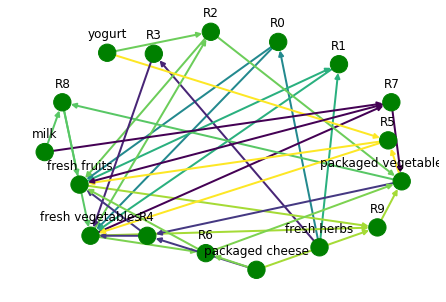

In [50]:
draw_graph(rulesConfidenceComp, 10)

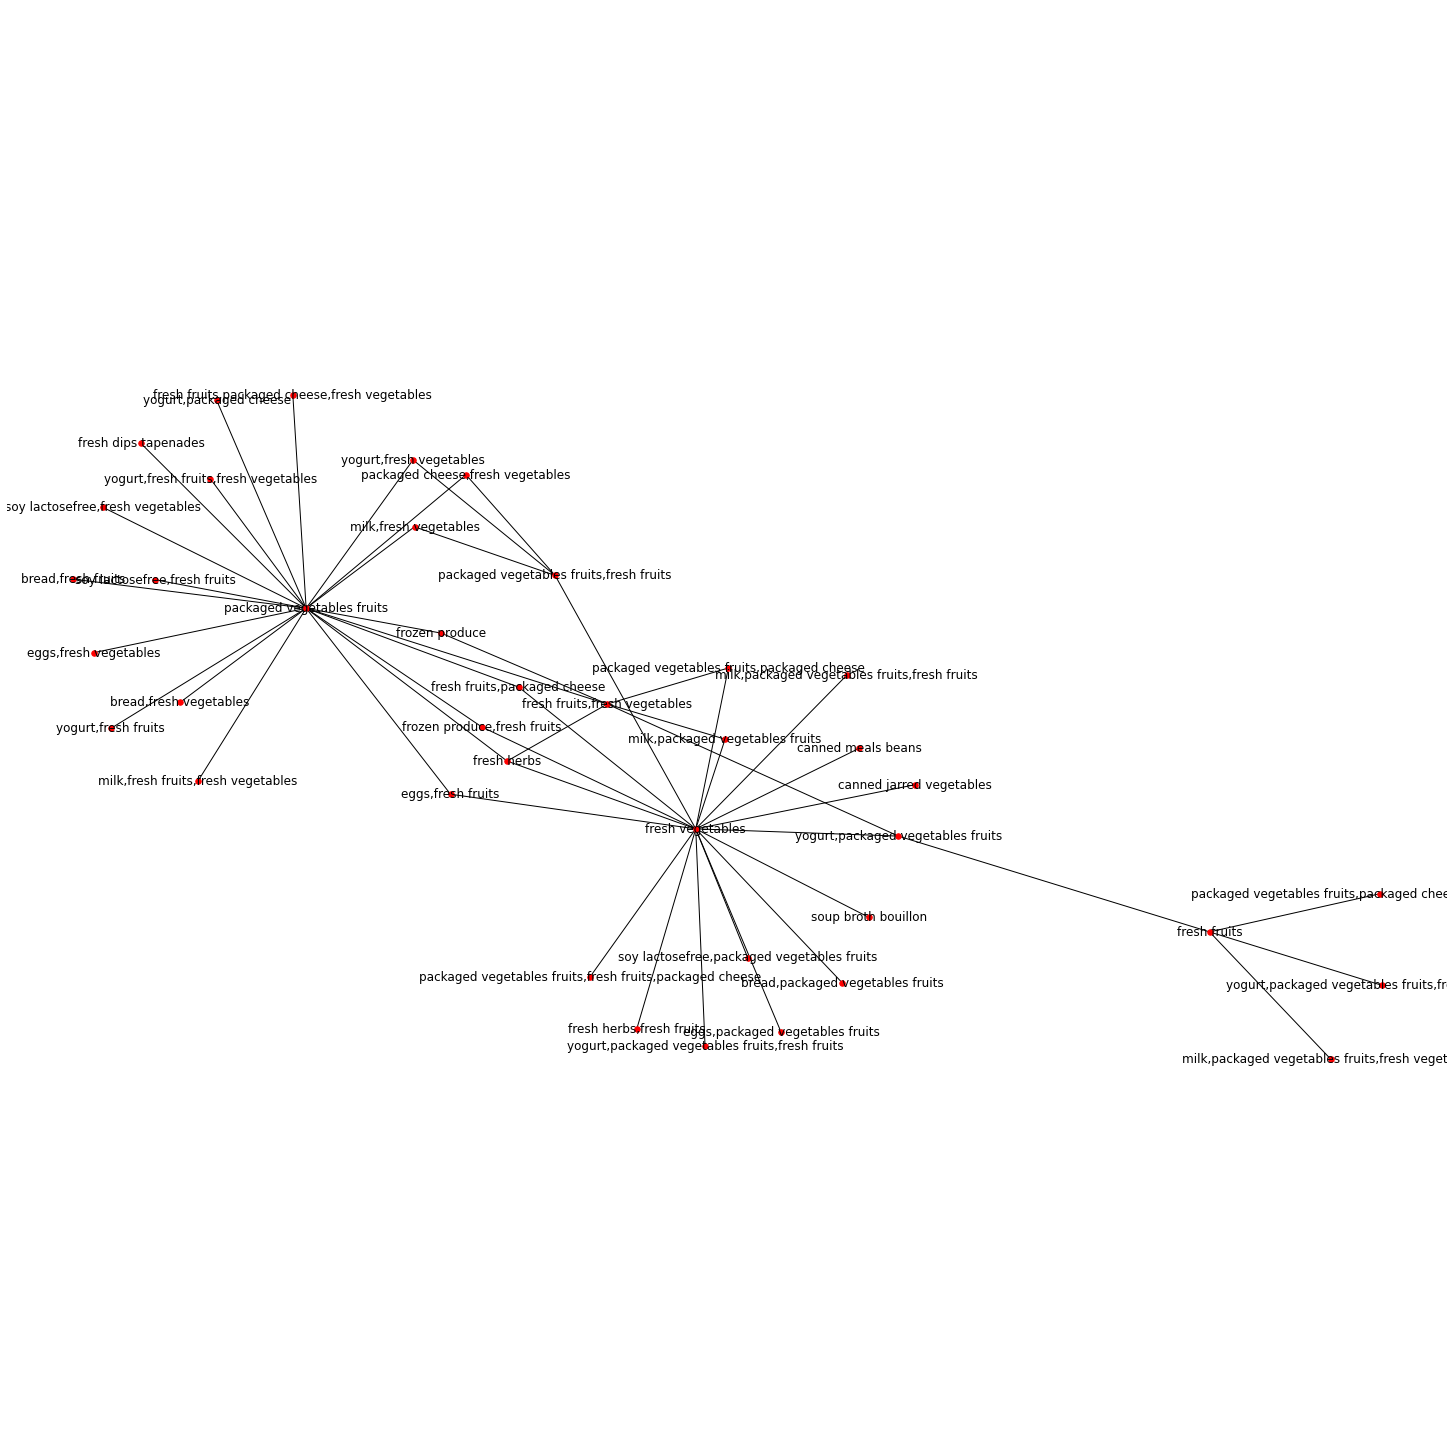

In [51]:
### Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidenceComp.copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(20, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')  
# Each node is an itemset (either source or target) and the edges connect the itemsets if they consist of a high confidence rule
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()
#fig.savefig('figure.svg')
# TRY TO PLOT THE DIRECTION OF SOURCE -> TARGET